In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression class

In [2]:
# X = [n x m]
# w = [m x 1]
# y = [n x 1]

In [3]:
class LinearRegression:
    def __init__(self, 
                 iter_num = 20, 
                 step = 0.1,
                 alpha = 0.1):
        self.iter_num = iter_num
        self.step = step
        self.alpha = alpha
        

    def fit(self, X, y):

        # add constant column to take intercept into account
        X = self.__update_X(X)

        # y = [n x 1]
        y = y.reshape(-1, 1)
        
        self.n = X.shape[0] # number of rows
        self.m = X.shape[1] # number of features (including intercept)

        # set initial values of weights
        # w = [m x 1]
        self.w = np.random.rand(self.m, 1)

        # gradient descent
        loss = []
        for _ in range(self.iter_num):
            self.w = self.w - self.step * self.__gradient(X, y)
            loss.append(self.loss_func(np.dot(X, self.w), y))
        return loss

    
    def predict(self, X):
        # add constant column to take intercept into account
        X = self.__update_X(X)
        return np.dot(X, self.w)

    
    def score(self, y_pred, y_true):
        return self.loss_func(y_pred, y_true)

    
    def __gradient(self, X, y):
        # loss function derivative
        d_w = (1/self.n) * np.dot((np.dot(X, self.w) - y).T, X)
        d_w[1:] += (self.alpha/self.n) * self.w[1:] # regularization term
        return d_w.reshape((self.m, 1))

    def loss_func(self, y_pred, y_true):
        y_pred = y_pred.reshape(-1, 1)
        y_true = y_true.reshape(-1, 1)
        assert y_pred.shape == y_true.shape
        
        return (1/(2*self.n)) * np.sum((y_pred - y_true)**2) + (self.alpha/(2*self.n)) * np.sum(self.w[1:] ** 2)

    @staticmethod
    def __update_X(X):
        return np.hstack((np.ones((X.shape[0], 1)), X))
 

## Test

In [4]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 20, 
                       n_features = 1,
                       noise = 2,
                       random_state = 42)

In [5]:
lr1 = LinearRegression(alpha = 0)
history1 = lr1.fit(X, y)

lr2 = LinearRegression(alpha = 0.5)
history2 = lr2.fit(X, y)

lr3 = LinearRegression(alpha = 1)
history3 = lr3.fit(X, y)

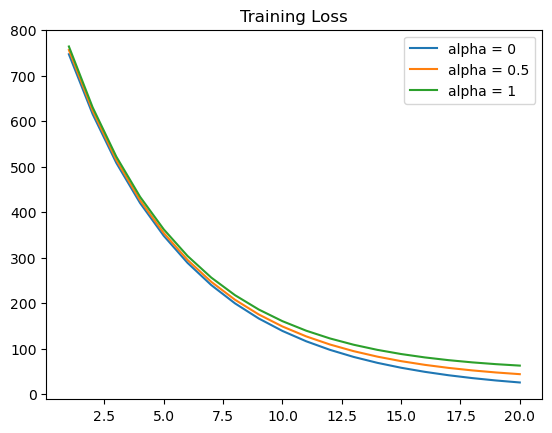

In [7]:
# the more regularization coeff alpha ----> the more value of loss function
# (model become LESS ACCURATE on training data but at the same time LESS OVERFITTED)

epoches = range(1, len(history1) + 1)

plt.plot(epoches, history1, label = 'alpha = 0')
plt.plot(epoches, history2, label = 'alpha = 0.5')
plt.plot(epoches, history3, label = 'alpha = 1')
plt.title("Training Loss")
plt.legend()

Text(0.5, 1.0, 'Linear regression on generated data')

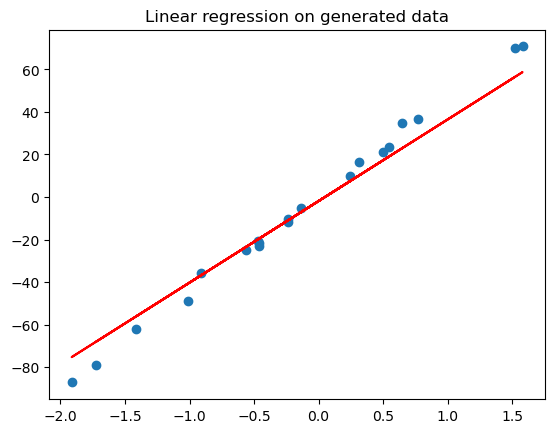

In [8]:
plt.scatter(X, y)
plt.plot(X, lr3.w[0] + lr3.w[1] * X, color = 'r', label = 'Regression line')
plt.title("Linear regression on generated data")

In [9]:
print(lr1.score(lr1.predict(X), y))
print(lr2.score(lr2.predict(X), y))
print(lr3.score(lr3.predict(X), y))

25.386540277349695
43.66028812684269
62.48785493669376
